In [1]:
# Imports
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
salary  = pd.read_csv('salary_plus_snacks.csv')
salary.head()

,YearsExperience,Salary,Snacks
0,13.5,139465,13
1,12.9,135675,13
2,12.3,128765,12
3,11.2,127345,12
4,11.5,126756,12


In [4]:
# Selecting Features
X = salary["Snacks"].values
y = salary["Salary"].values

In [5]:
# X Data
X

array([13, 13, 12, 12, 12, 12, 12, 11, 11, 11, 10, 10, 10,  9,  9,  8,  8,
        7,  7,  6,  6,  6,  6,  6,  5,  5,  5,  5,  5,  5,  4,  4,  3,  3,
        0])

In [6]:
# y Data
y

array([139465, 135675, 128765, 127345, 126756, 122391, 121872, 116969,
       113812, 112635, 109431, 105582, 101302,  98273,  93940,  91738,
        83088,  81363,  67938,  66029,  64445,  63218,  61111,  60150,
        57189,  57081,  56957,  56642,  55794,  54445,  46205,  43525,
        39891,  39343,  37731])

In [7]:
X = X.reshape(-1, 1)
X

array([[13],
       [13],
       [12],
       [12],
       [12],
       [12],
       [12],
       [11],
       [11],
       [11],
       [10],
       [10],
       [10],
       [ 9],
       [ 9],
       [ 8],
       [ 8],
       [ 7],
       [ 7],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 4],
       [ 4],
       [ 3],
       [ 3],
       [ 0]])

In [8]:
# Keep Track of our Data
# X feature = Years of Experience
# y = salary in $
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

In [9]:
print(f"X_train shape [{x_train.shape}")
print(f"y_train shape [{y_train.shape}")
print(f"X_test shape [{x_test.shape}")
print(f"y_test shape [{y_test.shape}")

X_train shape [(28, 1)
y_train shape [(28,)
X_test shape [(7, 1)
y_test shape [(7,)


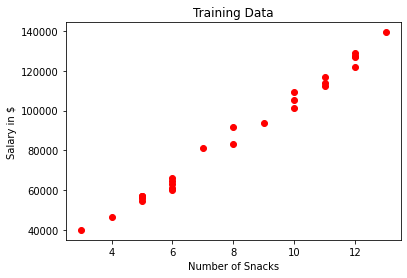

In [10]:
# Plot our training Data
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Number of Snacks')
plt.ylabel('Salary in $')
plt.title('Training Data')
plt.show()

In [11]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)
print(f'Train Accuracy {round(lm.score(x_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test)* 100,2)}%')

Train Accuracy 98.97%
Test Accuracy 88.99%


In [12]:
help(lm.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a
        precomputed kernel matrix or a list of generic objects instead,
        shape = (n_samples, n_samples_fitted),
        where n_samples_fitted is the number of
        samples used in the fitting

<function matplotlib.pyplot.plot>

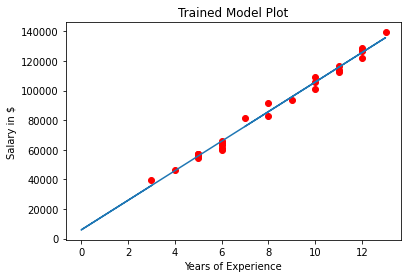

In [13]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict)
plt.xlabel('Years of Experience')
plt.ylabel('Salary in $')
plt.title('Trained Model Plot')
plt.plot

In [14]:
import seaborn as sns

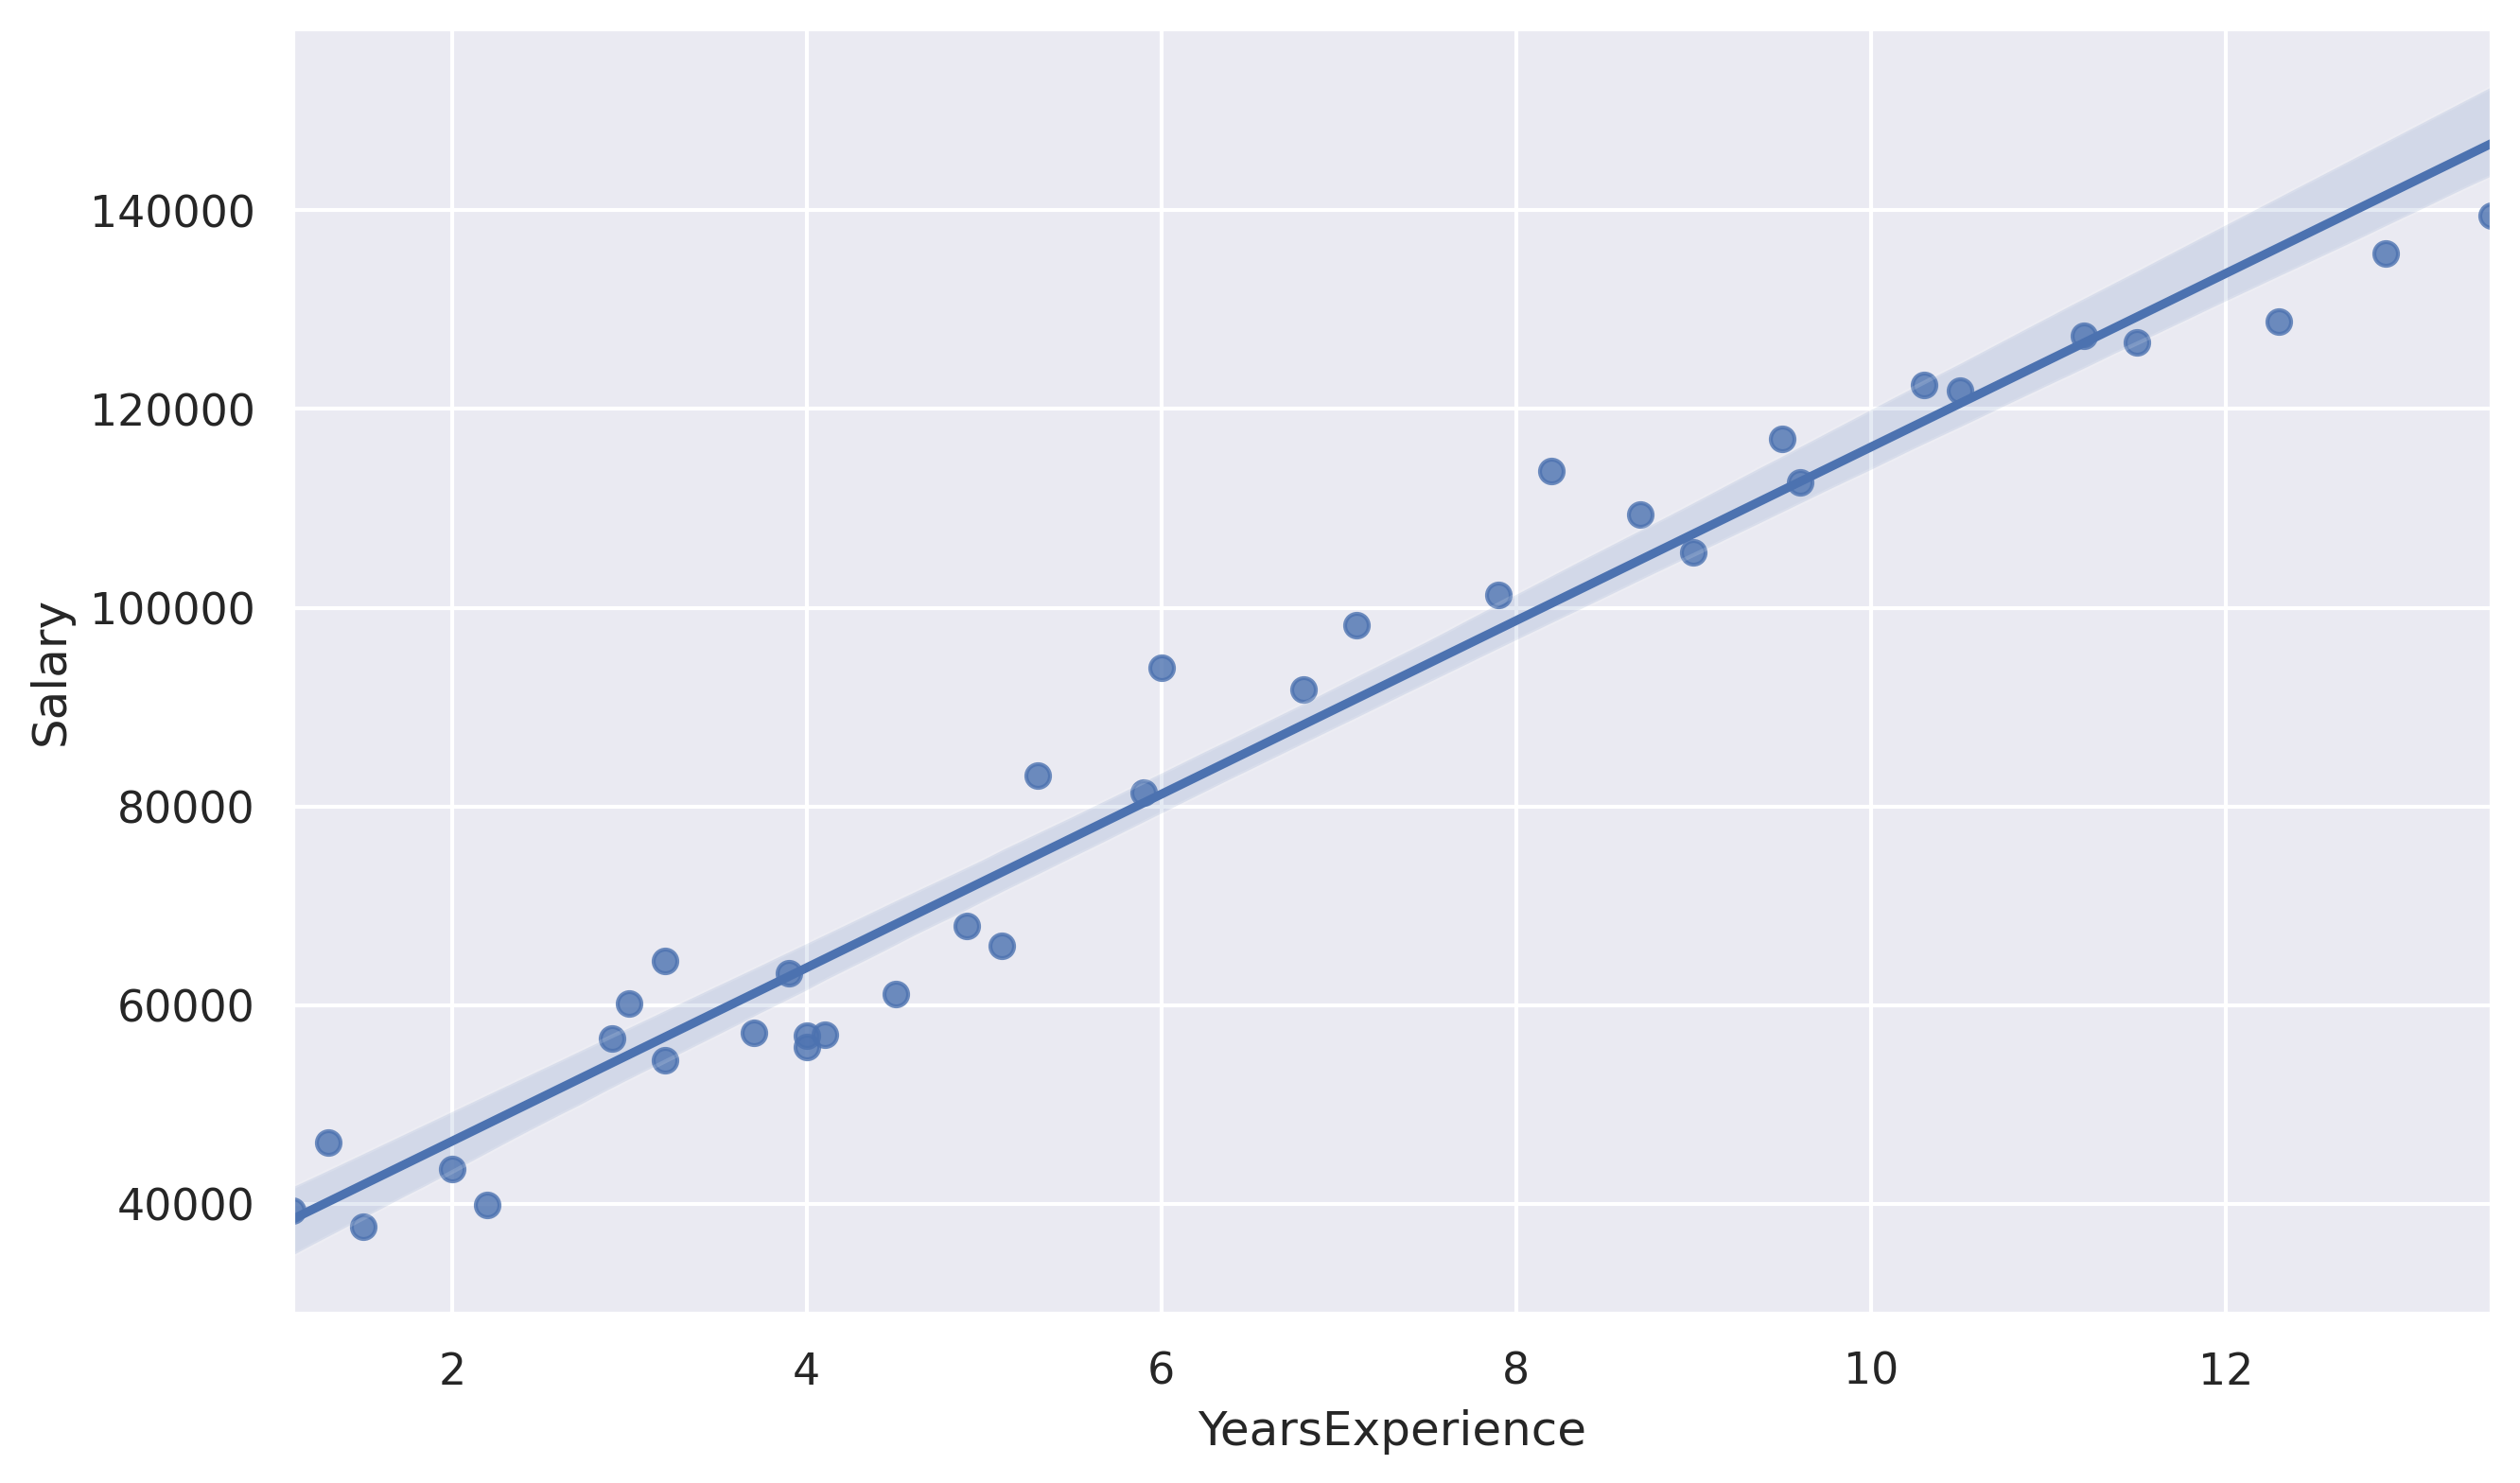

In [19]:
sns.set()
plt.figure(figsize=(10,6), dpi=300)
sns.regplot(x='YearsExperience', y='Salary', data=salary)

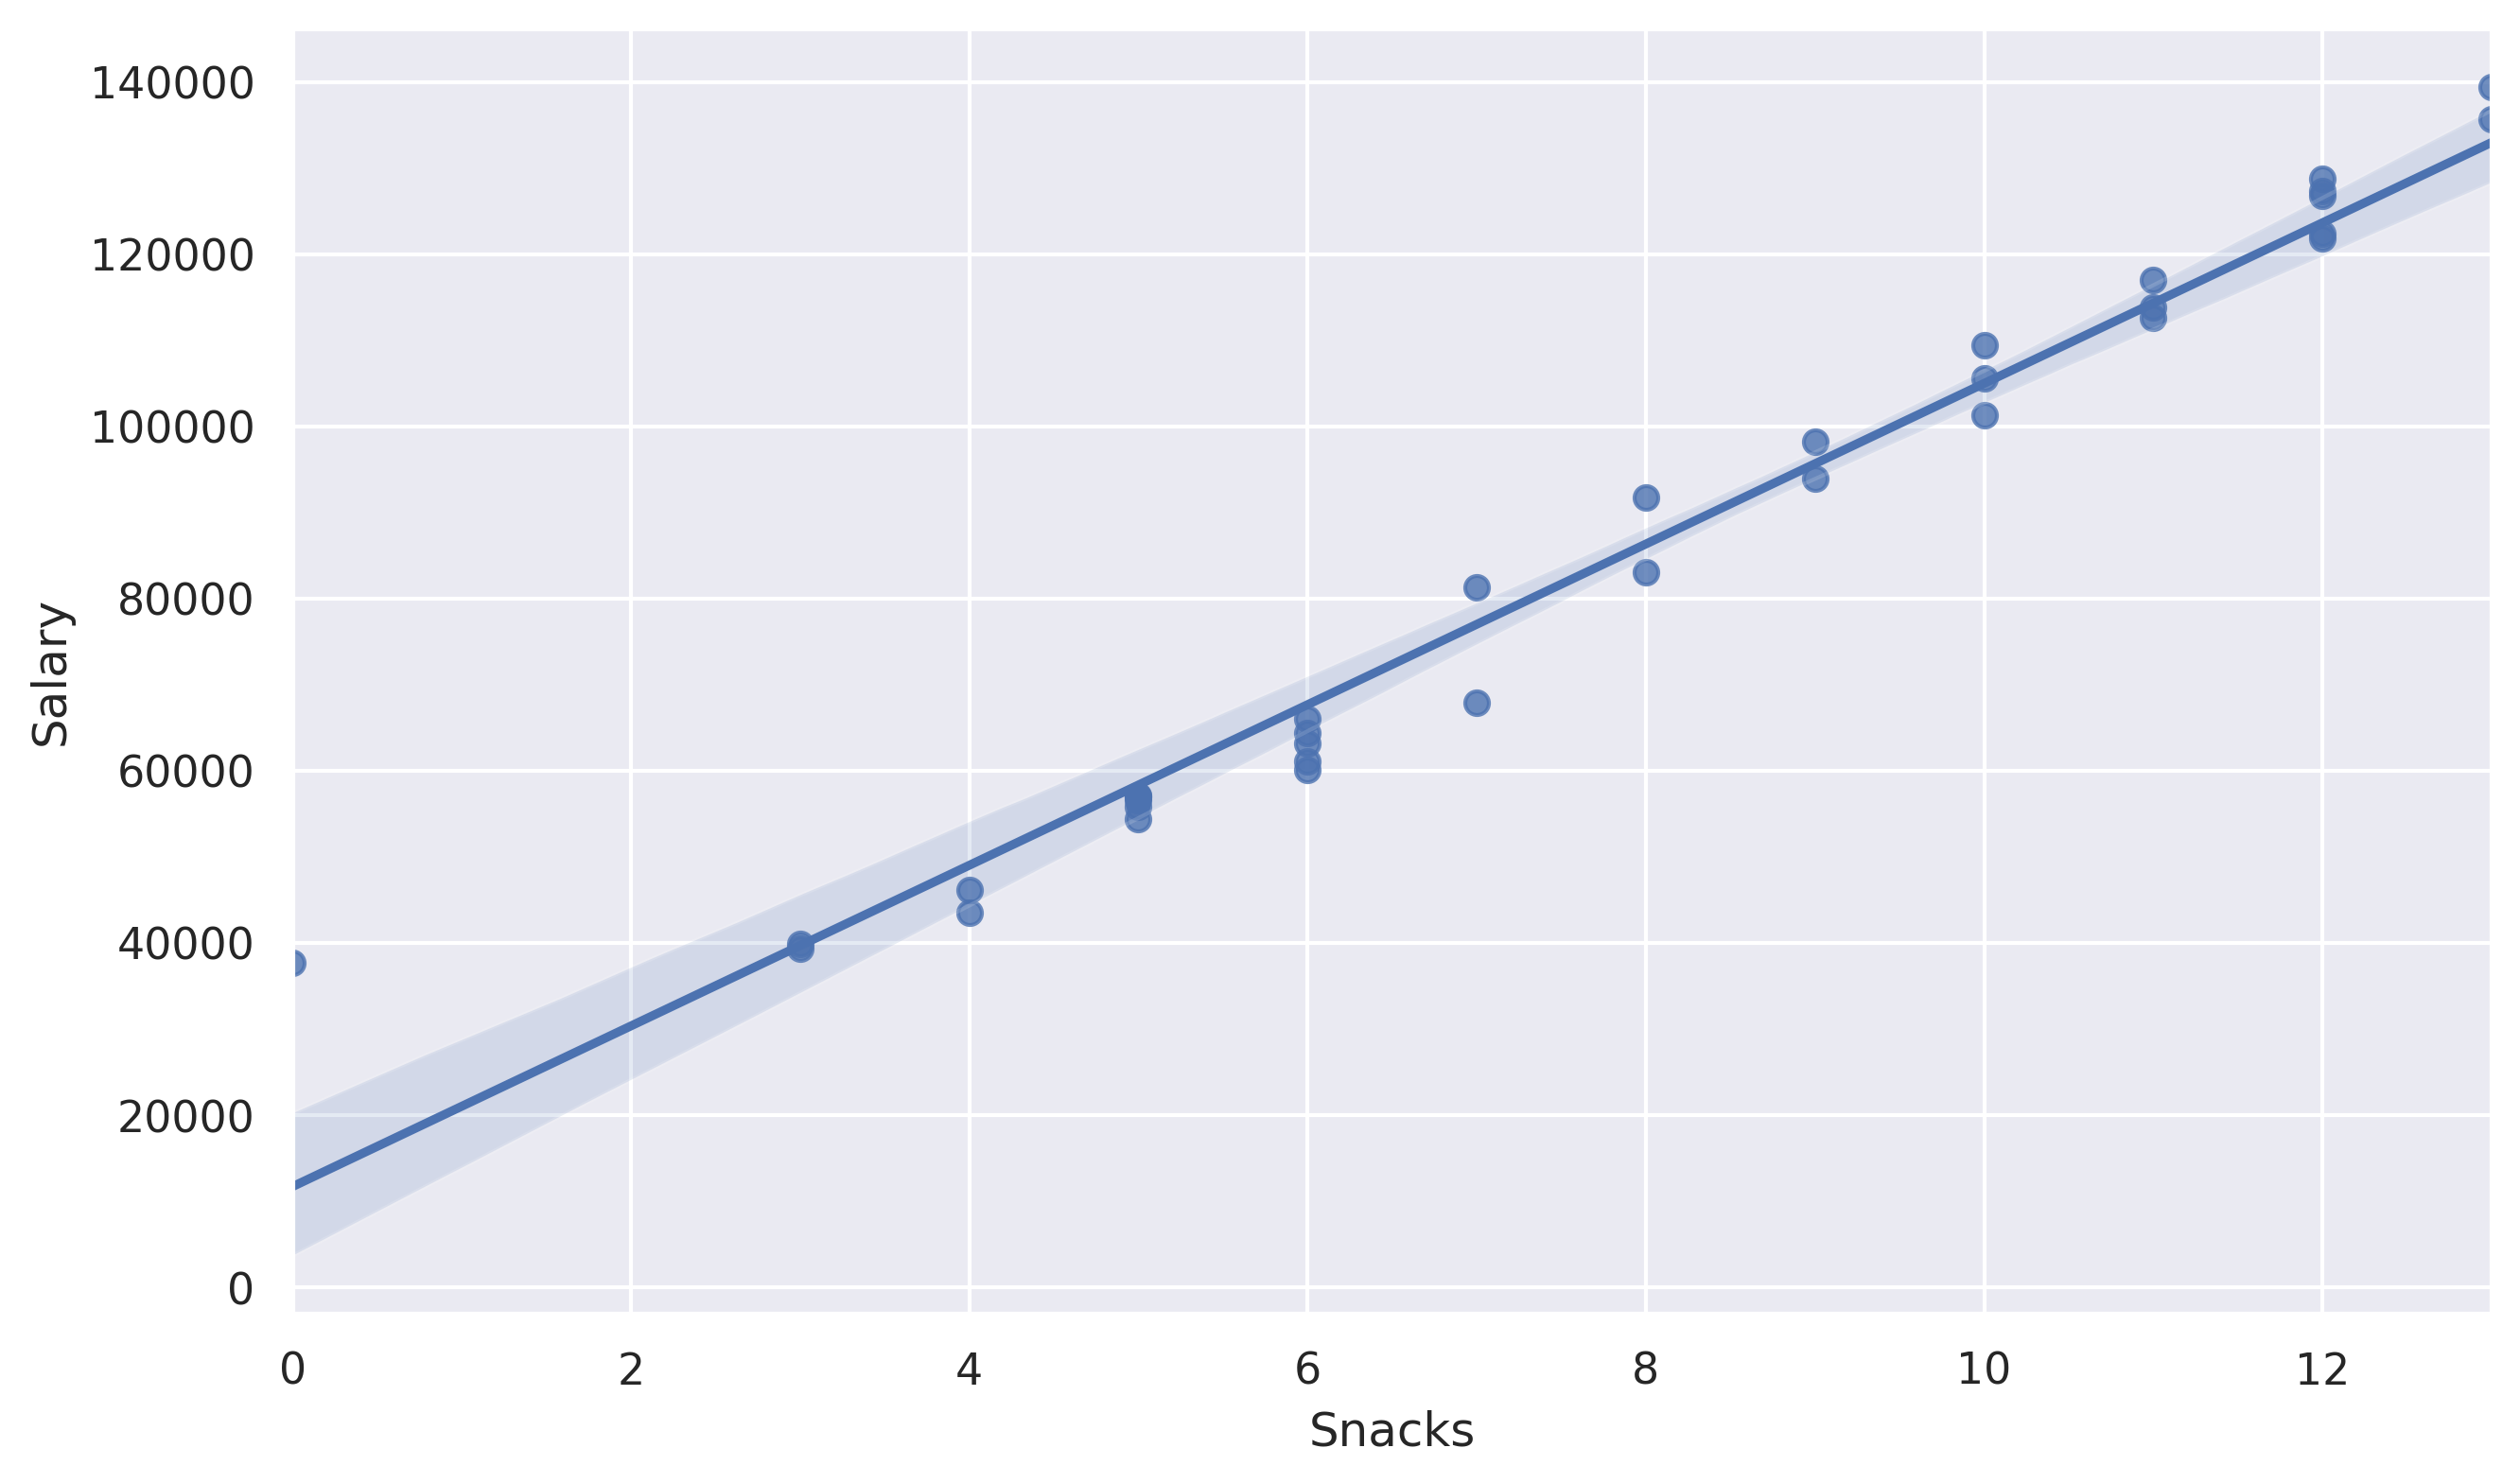

In [21]:
sns.set()
plt.figure(figsize=(10,6), dpi=300)
sns.regplot(x='Snacks', y='Salary', data=salary)

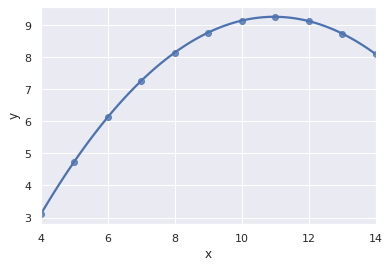

In [28]:
anscombe = sns.load_dataset("anscombe")
sns.regplot(x = "x", y = "y", data=anscombe.query("dataset == 'II'"), order=2)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


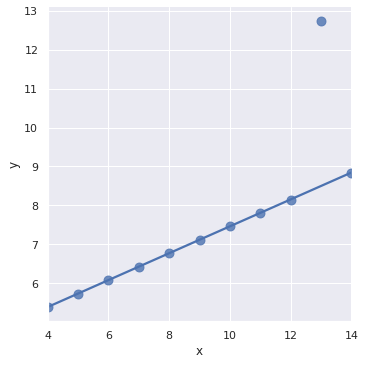

In [35]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80})

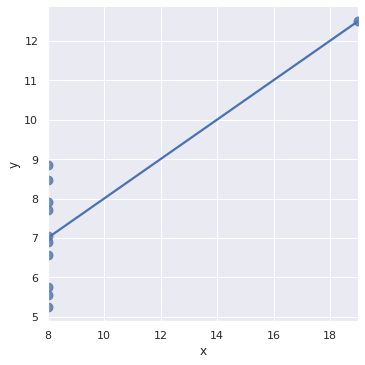

In [36]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'IV'"),ci=None, scatter_kws={"s": 80})

In [37]:
datasets = ["I","II","III","IV"]

for dataset in datasets:
    print("Dataset", dataset)
    data=anscombe.query(f"dataset == '{dataset}'")

    am = LinearRegression().fit(data.x.values.reshape(-1,1), data.y.values)
    print(am.coef_)
    print(am.intercept_)

Dataset I
[0.50009091]
3.0000909090909094
Dataset II
[0.5]
3.00090909090909
Dataset III
[0.49972727]
3.002454545454545
Dataset IV
[0.49990909]
3.0017272727272726
